#### Context
This data set is created only for the learning purpose of the customer segmentation concepts , also known as market basket analysis . We will demonstrate this by using unsupervised ML technique (KMeans Clustering Algorithm) in the simplest form.

#### Inspiration
By the end of this case study , we would be able to answer below questions.
1. How to achieve customer segmentation using machine learning algorithm (KMeans Clustering) in Python in simplest way.
2. Who are our target customers with whom we can start marketing strategy [easy to converse]
3. How the marketing strategy works in real world

#### workflow
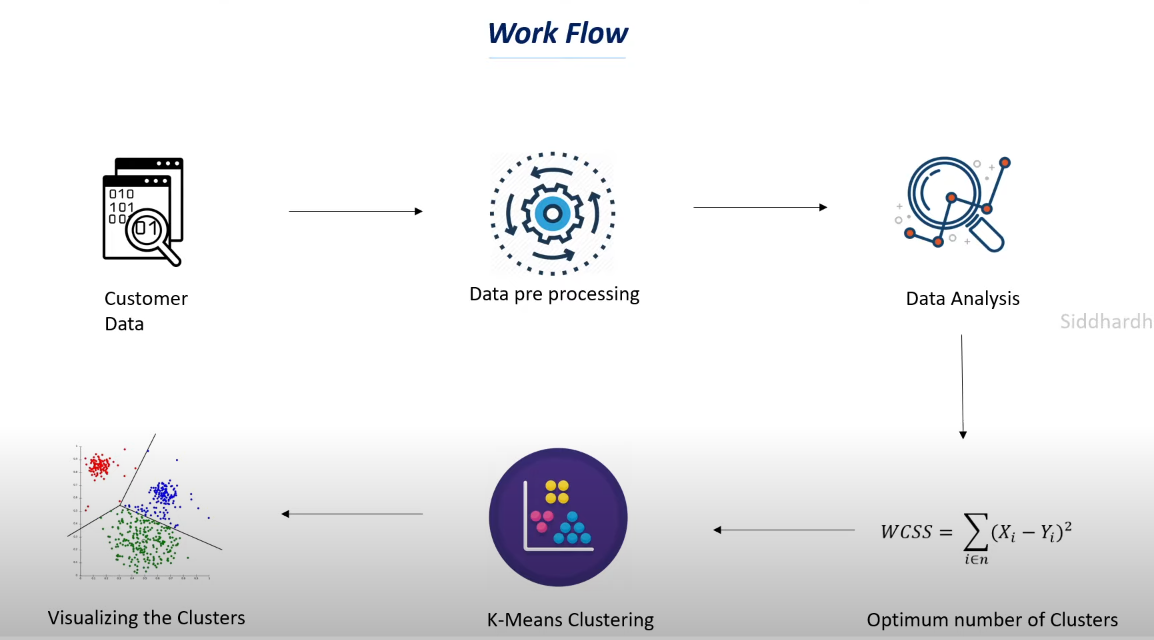

#### load the dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

C:\Users\Shashi Shekhar\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


#### data collection and analysis

In [2]:
#load the dataset csv to pandas dataframe
data=pd.read_csv(r"C:\Users\Shashi Shekhar\Desktop\python\Dataset for resume projects\Mall_Customers.csv")
data.shape

(200, 5)

In [3]:
# first 5 rows
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# last 5 row
data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [5]:
#getting information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
#getting na/null details
data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

###### no null/na avialable

In [7]:
# statistical datas details
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


#### chosing the "Annual Income" column and "Spending Score" column

In [8]:
#as array we have to get the columns
X=data.iloc[:, [3, 4]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

#### choosing the number of clusters
1. wcss->with in clusters sum of square
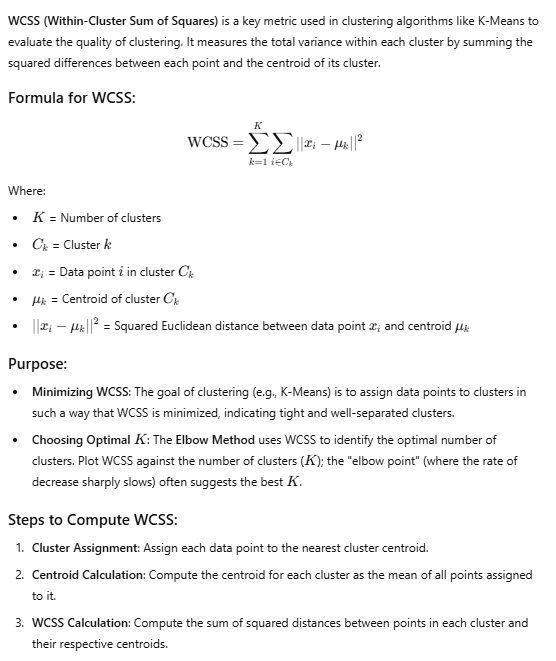


In [9]:
#finding wcss value for different number of clusters
wcss=[]
# craeting a loop
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init="k-means++", random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

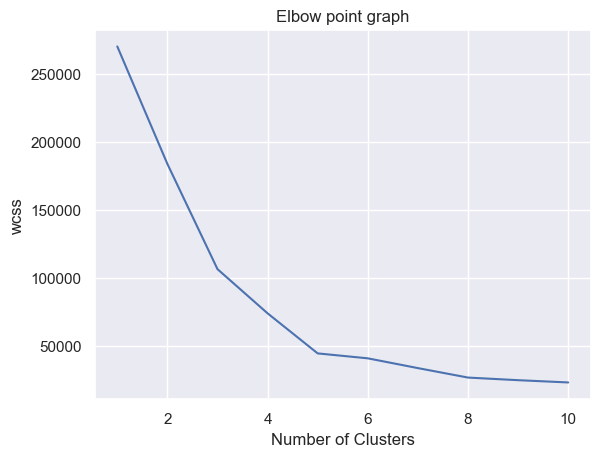

In [11]:
#plot elbow graph
sns.set()
plt.plot(range(1,11), wcss)
plt.title("Elbow point graph")
plt.xlabel("Number of Clusters")
plt.ylabel("wcss")
plt.show()

#### from above graph we observe that optimum number of clusters =5

In [12]:
#training the k-means clustering model
kmeans = KMeans(n_clusters=5, init="k-means++", random_state=0)
# return a label for each data point based on their cluster
Y=kmeans.fit_predict(X)
Y

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

#### visualizing all the clusters

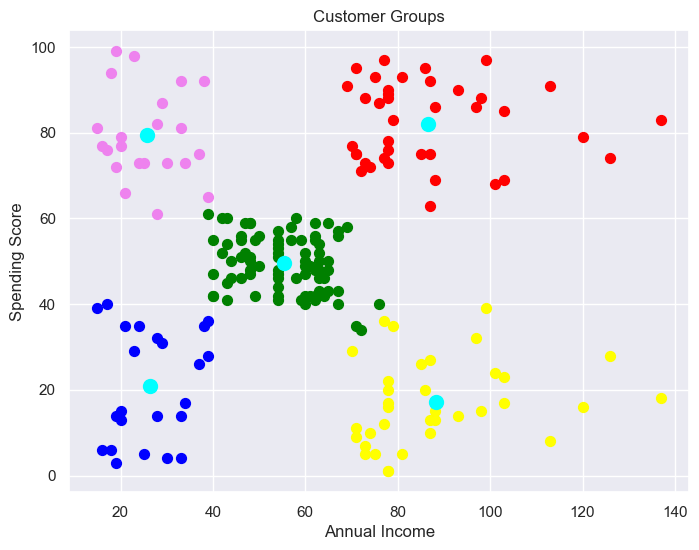

In [17]:
# 5 clusters are: 0,1,2,3,4
# plotting all the clusters and their centroids
plt.figure(figsize=(8,6))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c="green", label="cluster 1")
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c="red", label="cluster 2")
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c="yellow", label="cluster 3")
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c="blue", label="cluster 4")
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c="violet", label="cluster 5")
# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c="cyan", label="centroid")
plt.title("Customer Groups")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()
